In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [22]:
attrition_filepath = "/content/HR Employee data.csv"
df = pd.read_csv(attrition_filepath)

In [23]:
df.describe()

,EmployeeID,JoiningYear,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,LeavingYear
count,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.0,13423.000000,13423.000000,13423.000000,13423.00000,...,13423.0,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,3198.000000
mean,106711.000000,2018.825300,36.159949,803.998287,8.881472,1.0,1022.222677,2.369366,65.498622,2.46316,...,80.0,0.500410,10.572227,2.454518,2.496908,2.791626,1.898979,1.396037,1.873501,2020.392120
std,3875.030667,2.005345,8.126696,356.968483,6.844715,0.0,549.883093,0.941861,17.196420,0.66039,...,0.0,0.664563,7.246988,1.069622,0.656888,1.860029,1.039347,0.818350,1.004282,1.420644
min,100000.000000,2005.000000,18.000000,102.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,...,80.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000
25%,103355.500000,2018.000000,30.000000,514.500000,3.000000,1.0,554.000000,2.000000,52.000000,2.00000,...,80.0,0.000000,6.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2019.000000
50%,106711.000000,2019.000000,35.000000,800.000000,7.000000,1.0,1014.000000,2.000000,65.000000,3.00000,...,80.0,0.000000,9.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2021.000000
75%,110066.500000,2020.000000,41.000000,1106.000000,13.000000,1.0,1493.000000,3.000000,79.000000,3.00000,...,80.0,1.000000,14.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2022.000000
max,113422.000000,2021.000000,60.000000,1499.000000,29.000000,1.0,2068.000000,4.000000,100.000000,4.00000,...,80.0,3.000000,40.000000,6.000000,4.000000,15.000000,7.000000,6.000000,6.000000,2022.000000


In [24]:
df.dtypes.sort_values()

EmployeeID                    int64
TrainingTimesLastYear         int64
TotalWorkingYears             int64
StockOptionLevel              int64
StandardHours                 int64
RelationshipSatisfaction      int64
PerformanceRating             int64
PercentSalaryHike             int64
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
NumCompaniesWorked            int64
MonthlyRate                   int64
MonthlyIncome                 int64
YearsWithCurrManager          int64
JobSatisfaction               int64
JobInvolvement                int64
HourlyRate                    int64
EnvironmentSatisfaction       int64
EmployeeNumber                int64
EmployeeCount                 int64
DistanceFromHome              int64
DailyRate                     int64
Age                           int64
JoiningYear                   int64
WorkLifeBalance               int64
YearsAtCompany                int64
LeavingYear                 float64
Attrition                   

# Unique values

Our objective is to find any values with only 1 unique value, so that we can remove them. Here we found 3:

1. Over18
2. StandardHours
3. EmployeeCount

In [25]:
df.nunique().sort_values()

Over18                          1
StandardHours                   1
EmployeeCount                   1
OverTime                        2
Gender                          2
RelievingStatus                 2
Attrition                       2
BusinessTravel                  3
MaritalStatus                   3
JobInvolvement                  4
EducationField                  4
EnvironmentSatisfaction         4
RelationshipSatisfaction        4
StockOptionLevel                4
JobSatisfaction                 4
WorkLifeBalance                 4
LeavingYear                     5
PerformanceRating               5
YearsSinceLastPromotion         6
YearsWithCurrManager            6
Department                      6
YearsInCurrentRole              7
TrainingTimesLastYear           7
JobLevel_updated                7
office_code                     8
NumCompaniesWorked             10
YearsAtCompany                 15
Reason                         15
PercentSalaryHike              15
JoiningYear   

# Missing values

Our objective here is to find any columns with missing values. Here, we found 3:

1. LeavingYear
2. Reason
3. RelievingStatus

We realize that these 3 are a result of attrition and should not be included in our features.

In [26]:
df.isnull().sum()

EmployeeID                      0
JoiningYear                     0
Age                             0
BusinessTravel                  0
DailyRate                       0
Department                      0
DistanceFromHome                0
EducationField                  0
EmployeeCount                   0
EmployeeNumber                  0
EnvironmentSatisfaction         0
Gender                          0
HourlyRate                      0
JobInvolvement                  0
JobSatisfaction                 0
MaritalStatus                   0
MonthlyIncome                   0
MonthlyRate                     0
NumCompaniesWorked              0
Over18                          0
OverTime                        0
PercentSalaryHike               0
PerformanceRating               0
RelationshipSatisfaction        0
StandardHours                   0
StockOptionLevel                0
TotalWorkingYears               0
TrainingTimesLastYear           0
WorkLifeBalance                 0
YearsAtCompany

# Dropped values

In [27]:
df = df.drop(['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber', 'EmployeeID', 'LeavingYear', 'Reason', 'RelievingStatus'], axis=1)
df.nunique().sort_values()

Attrition                       2
Gender                          2
OverTime                        2
BusinessTravel                  3
MaritalStatus                   3
RelationshipSatisfaction        4
EducationField                  4
EnvironmentSatisfaction         4
JobInvolvement                  4
JobSatisfaction                 4
WorkLifeBalance                 4
StockOptionLevel                4
PerformanceRating               5
YearsWithCurrManager            6
Department                      6
YearsSinceLastPromotion         6
JobLevel_updated                7
TrainingTimesLastYear           7
YearsInCurrentRole              7
office_code                     8
NumCompaniesWorked             10
YearsAtCompany                 15
PercentSalaryHike              15
JoiningYear                    17
DistanceFromHome               29
TotalWorkingYears              41
Age                            43
HourlyRate                     71
DailyRate                    1391
MonthlyIncome 

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Attrition'] = le.fit_transform(df.Attrition)

df['Attrition']

0        1
1        1
2        1
3        1
4        1
        ..
13418    0
13419    0
13420    0
13421    0
13422    0
Name: Attrition, Length: 13423, dtype: int64

# Categorical variables

In [29]:
categorical_df = df.select_dtypes(include="object")
categorical_df.dtypes.sort_values()

BusinessTravel      object
Department          object
EducationField      object
Gender              object
MaritalStatus       object
OverTime            object
office_code         object
JobLevel_updated    object
dtype: object

# Numerical variables

In [30]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_df.dtypes.sort_values()

JoiningYear                 int64
YearsSinceLastPromotion     int64
YearsInCurrentRole          int64
YearsAtCompany              int64
WorkLifeBalance             int64
TrainingTimesLastYear       int64
TotalWorkingYears           int64
StockOptionLevel            int64
RelationshipSatisfaction    int64
PerformanceRating           int64
YearsWithCurrManager        int64
PercentSalaryHike           int64
MonthlyRate                 int64
MonthlyIncome               int64
JobSatisfaction             int64
JobInvolvement              int64
HourlyRate                  int64
EnvironmentSatisfaction     int64
DistanceFromHome            int64
DailyRate                   int64
Age                         int64
NumCompaniesWorked          int64
Attrition                   int64
dtype: object

# Data visualisation exploration

Our objective here is to find any unique insights.

Key insights:

1. Employees who travel frequently are likely to leave
2. Male employees are likely to leave
3. Single employees are likely to leave
4. Employees with low income are more likely to leave
5. Employees who work overtime are more likely to leave

Odd insights:

1. Those who performed average are more likely to stay while those with a lower or higher than average performance rating are more likely to leave

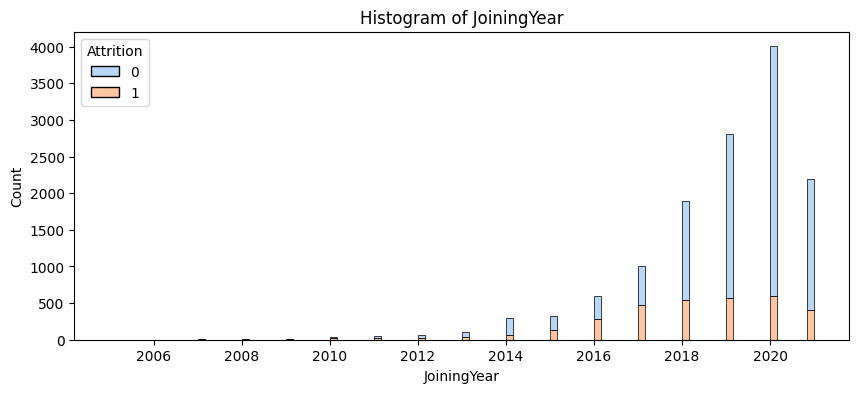

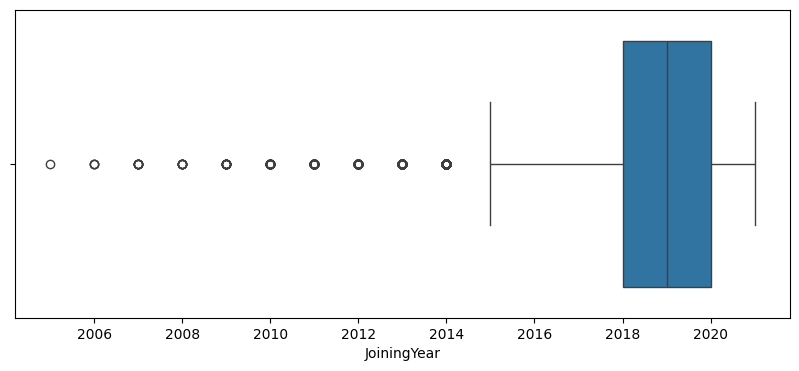

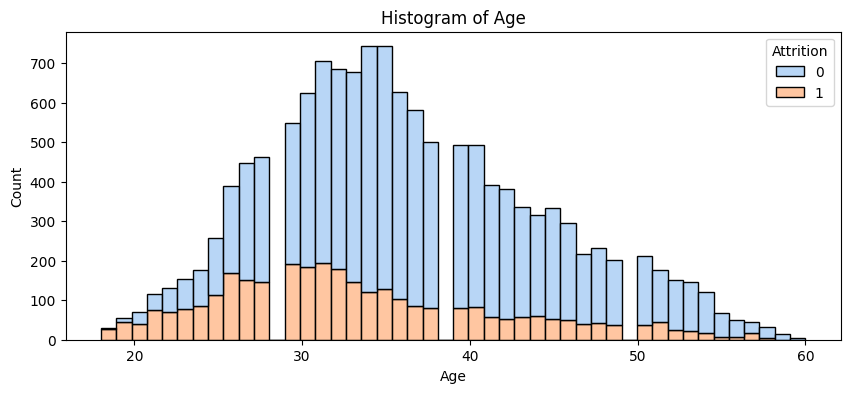

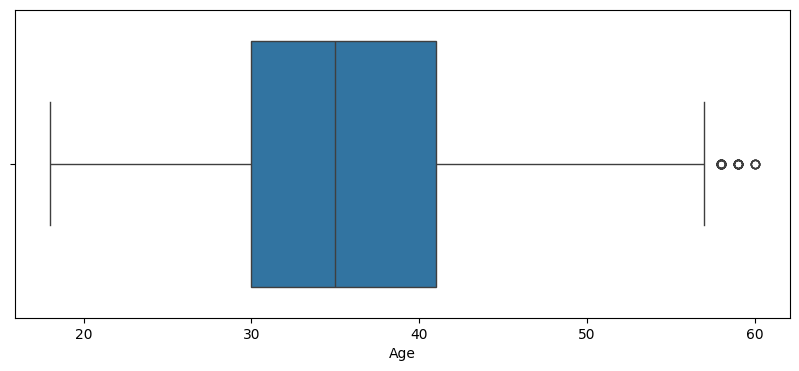

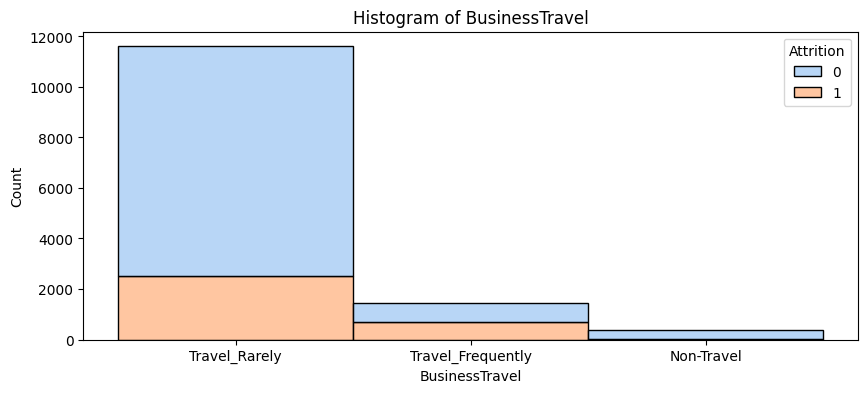

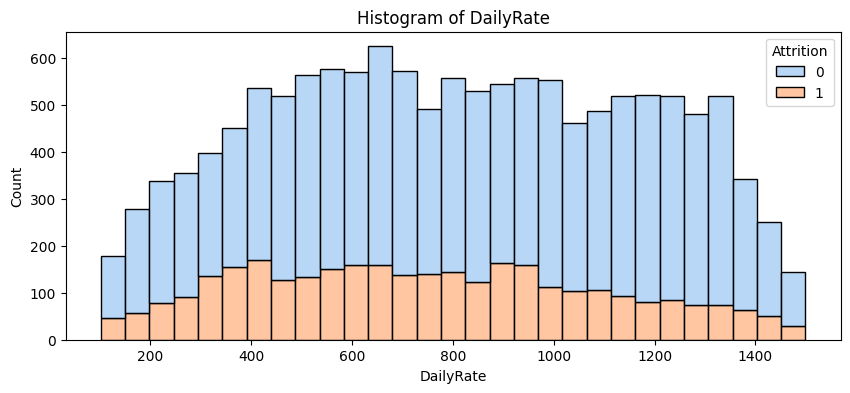

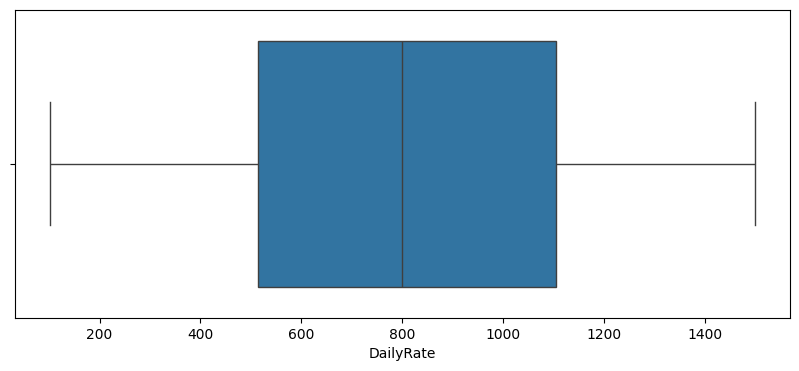

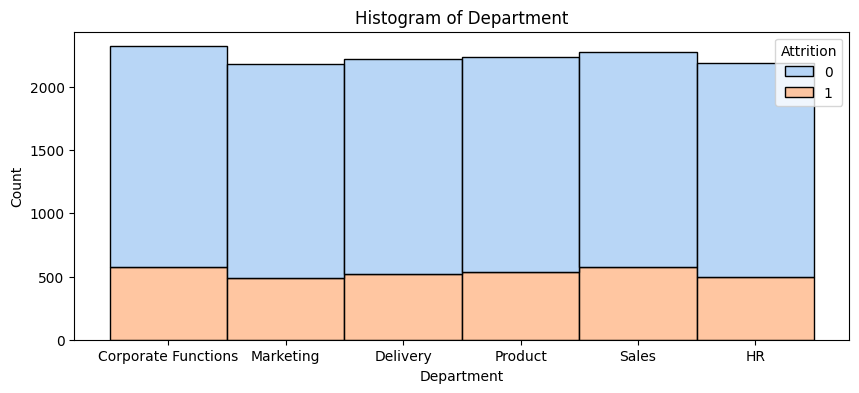

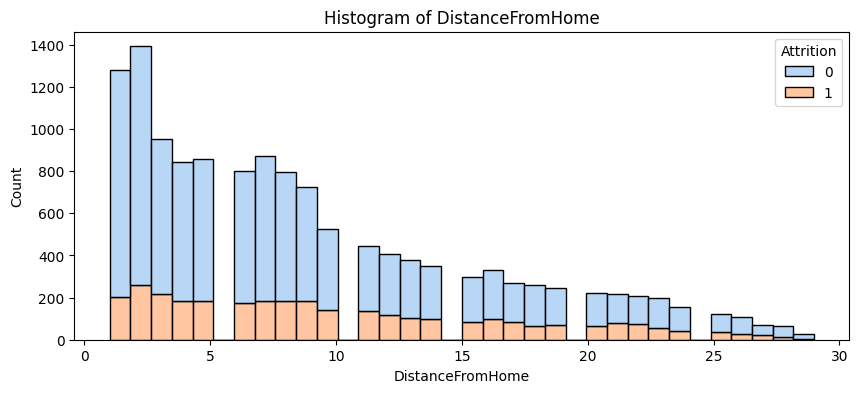

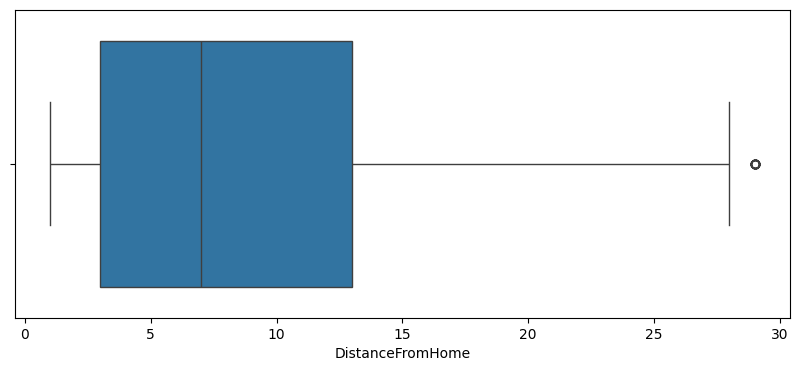

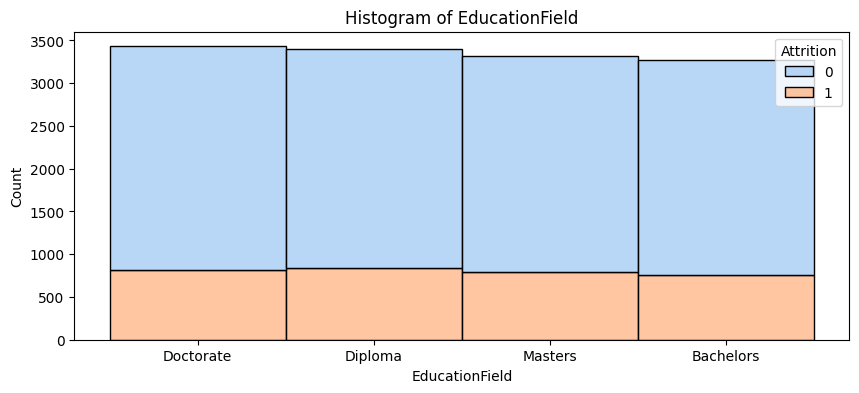

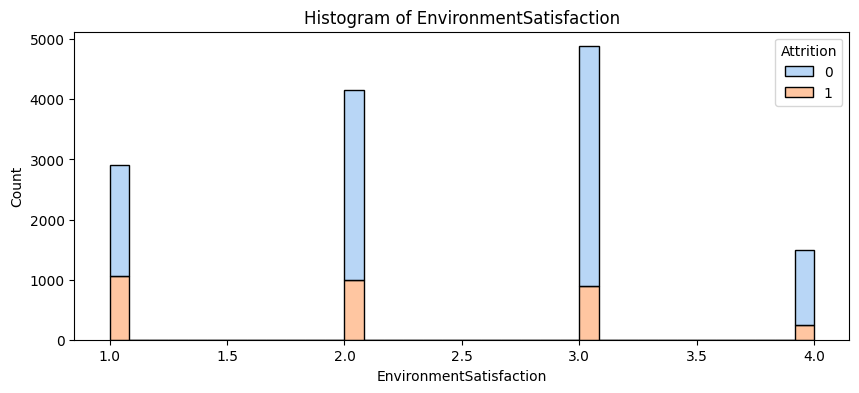

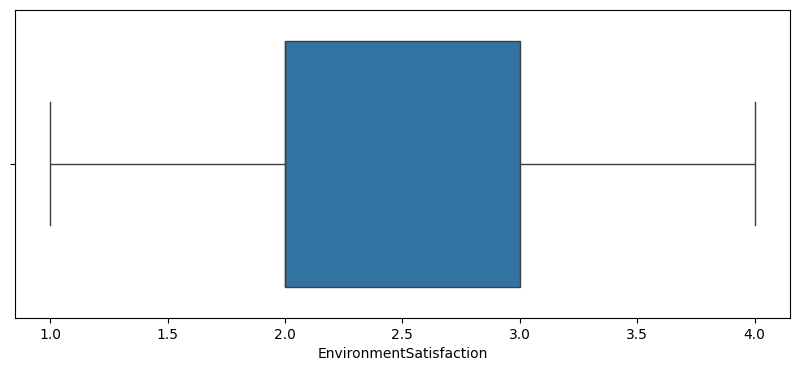

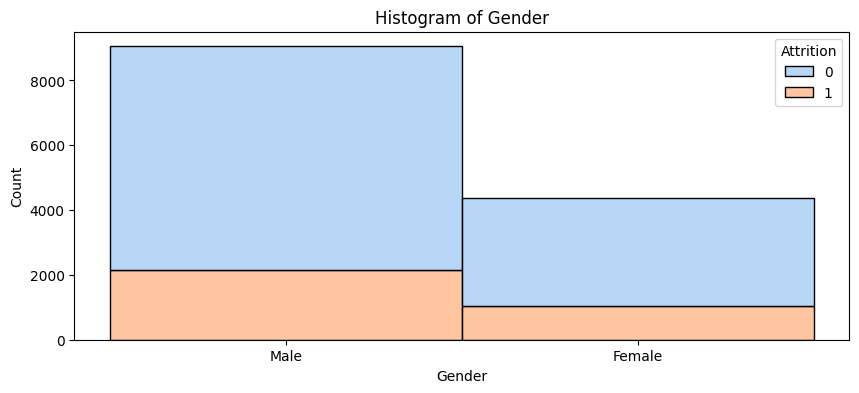

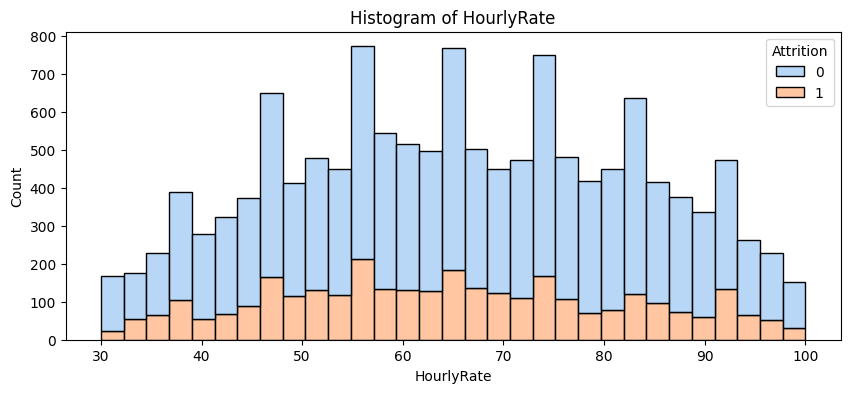

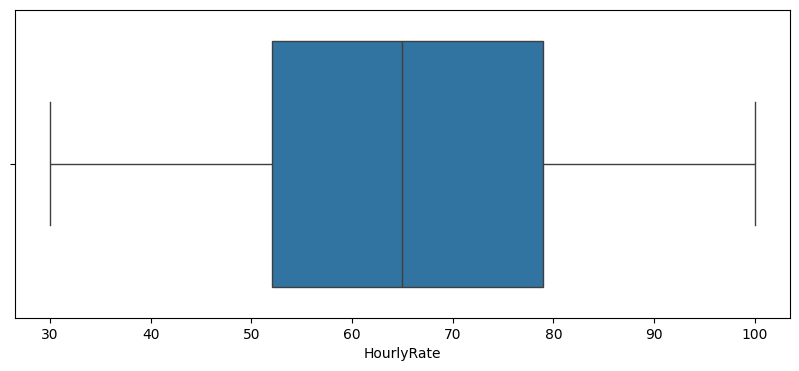

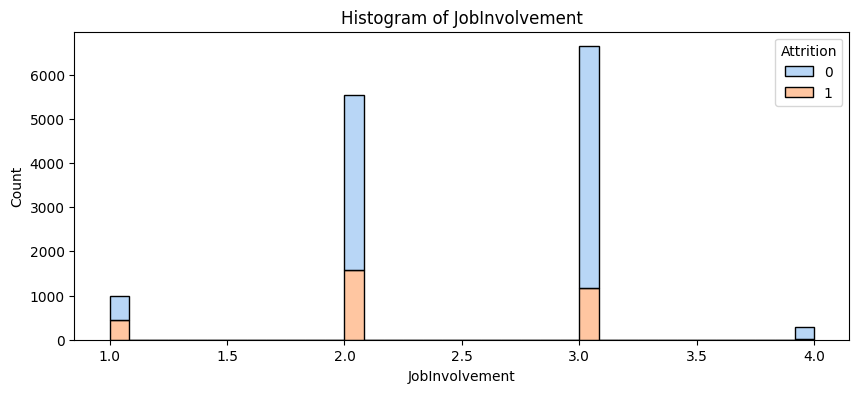

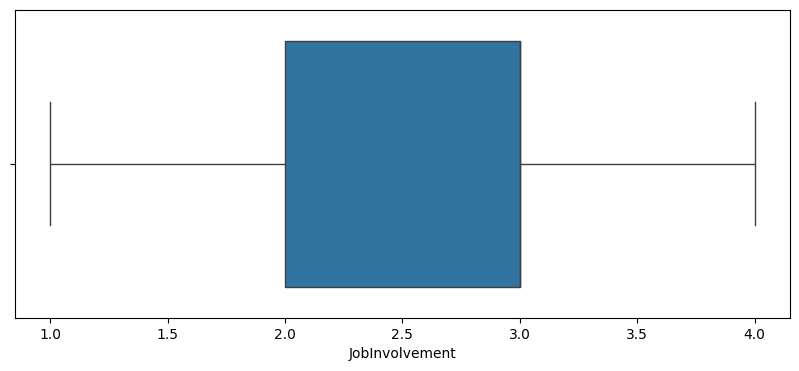

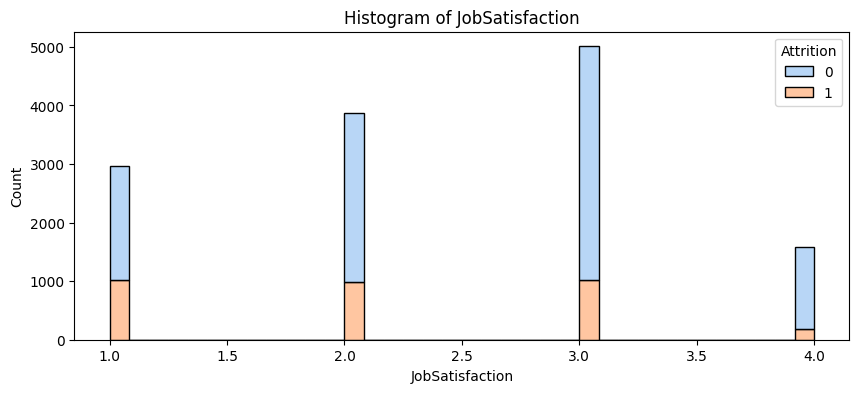

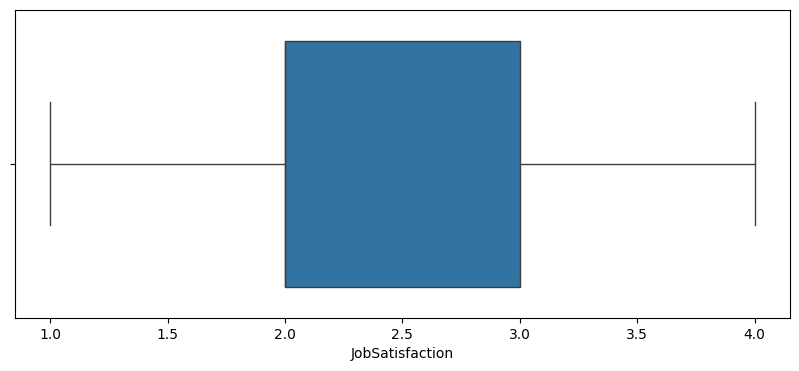

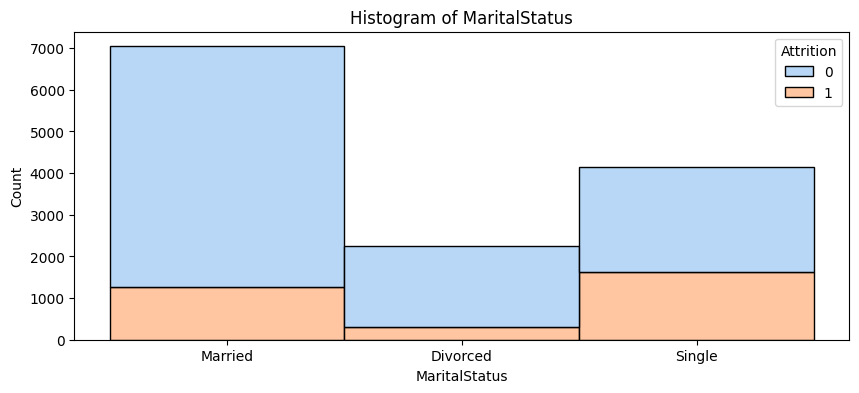

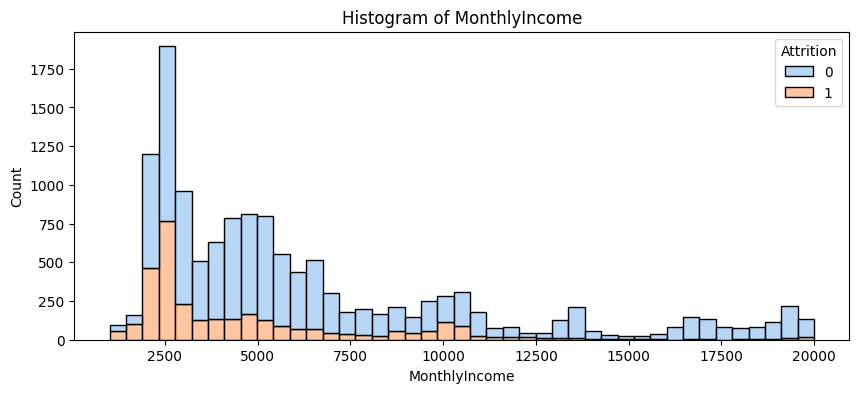

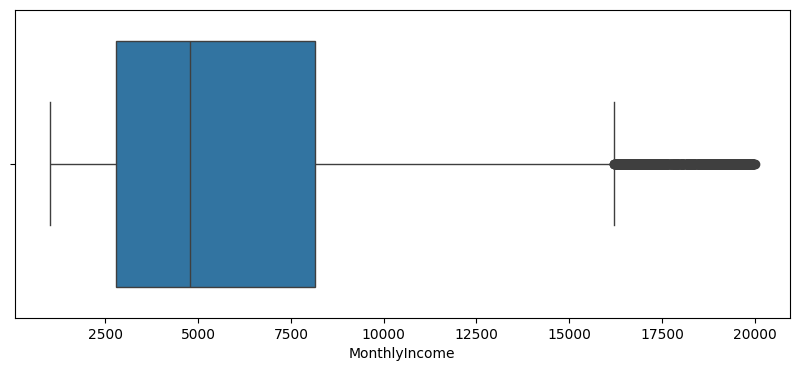

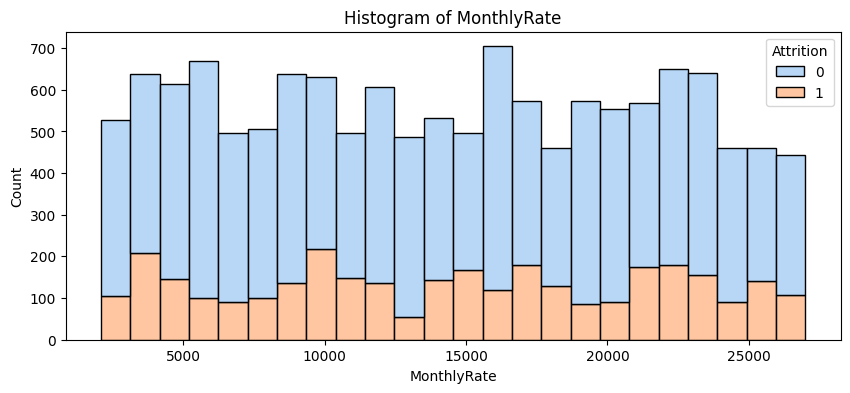

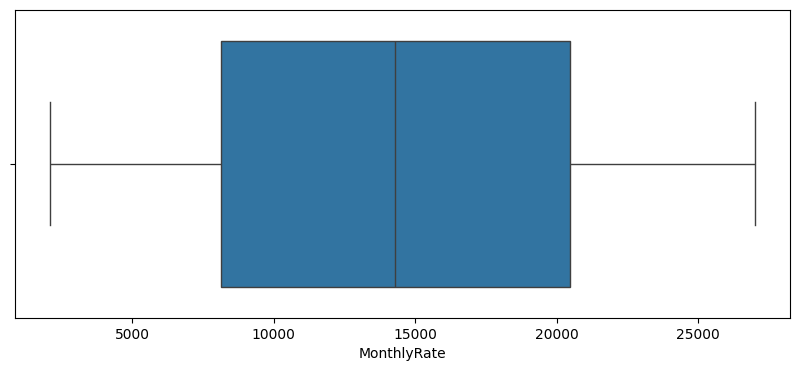

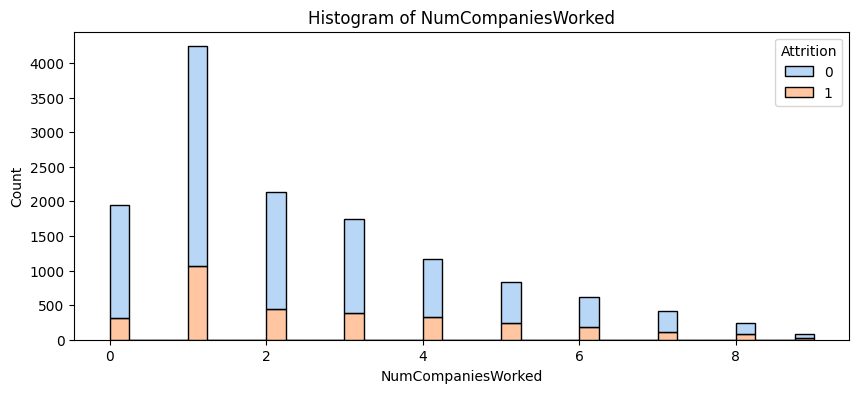

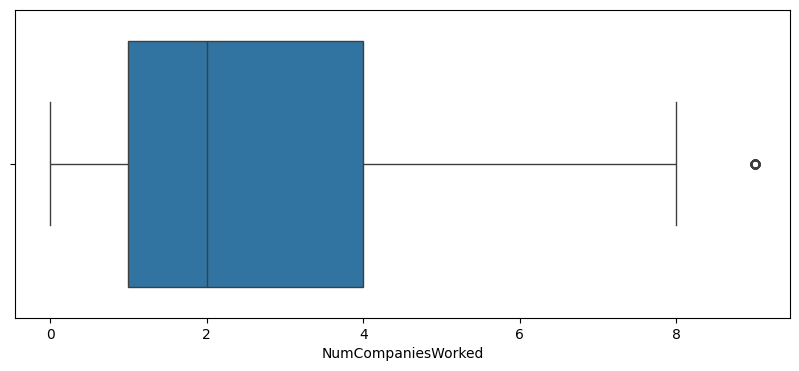

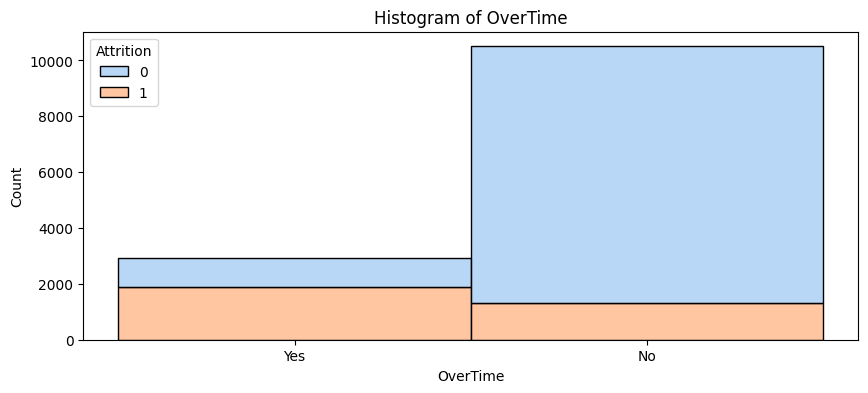

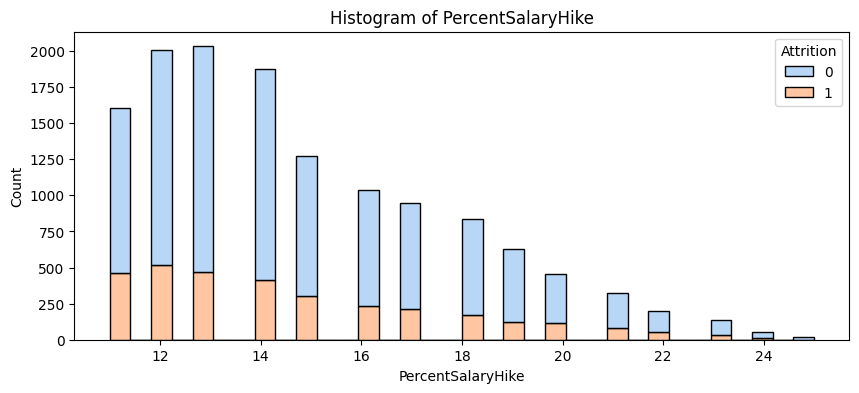

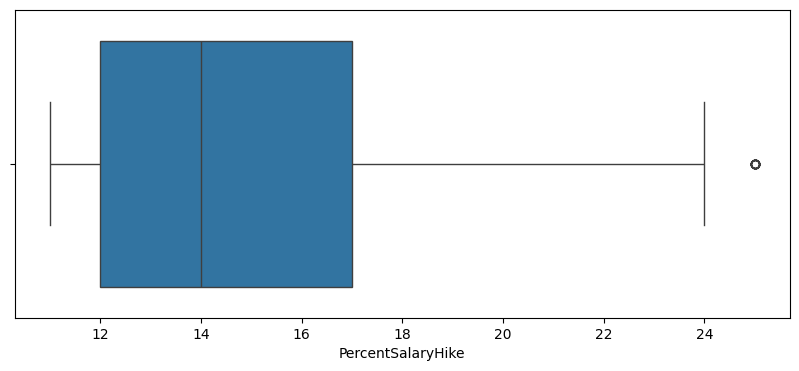

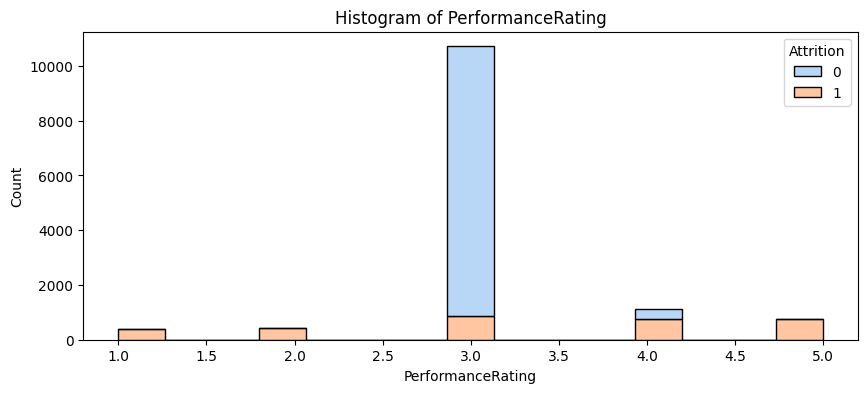

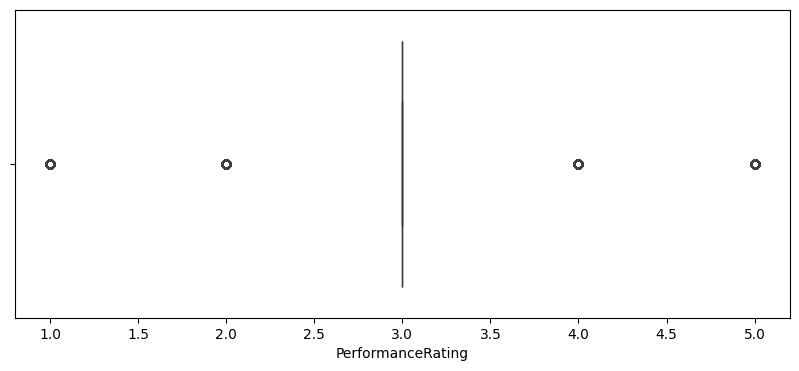

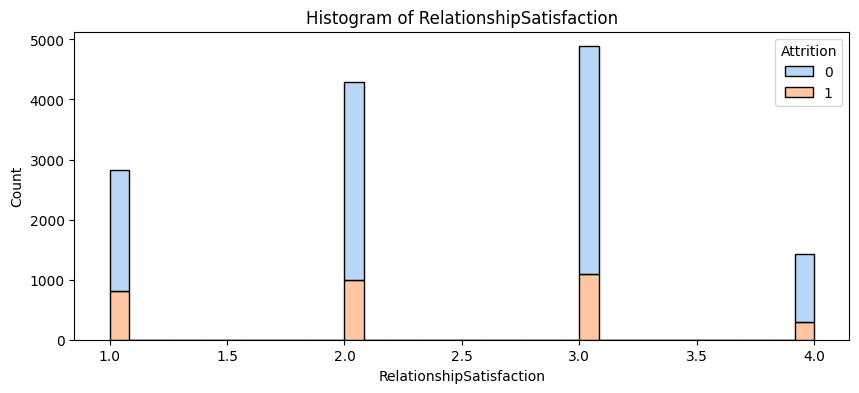

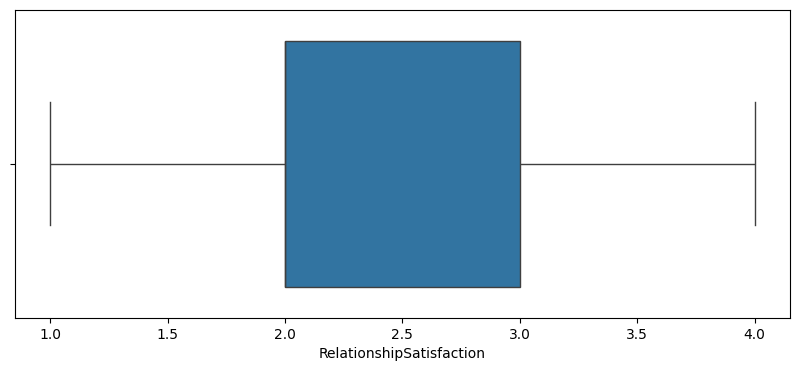

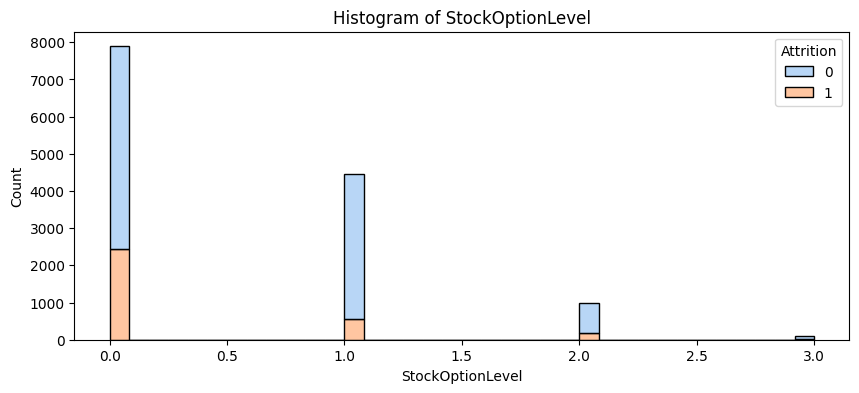

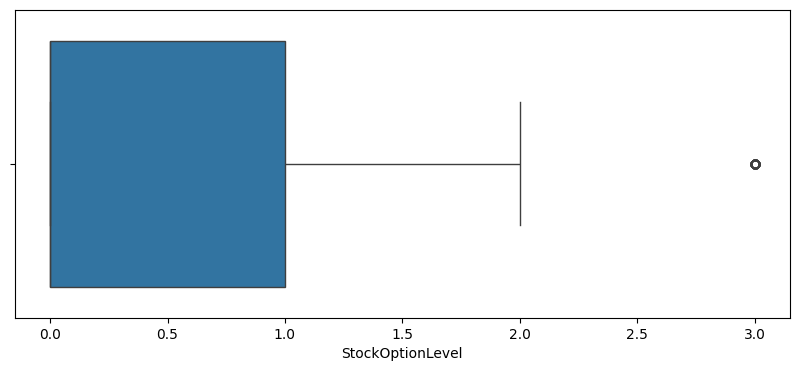

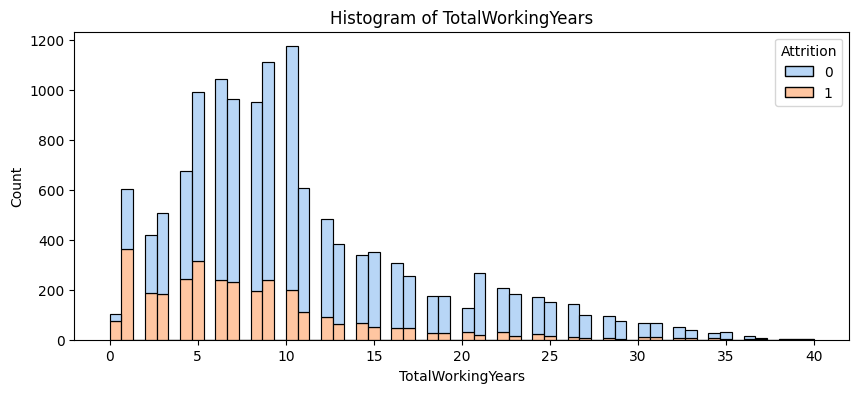

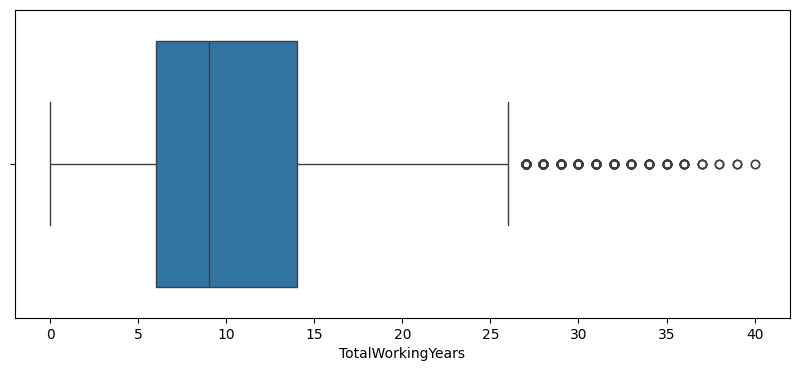

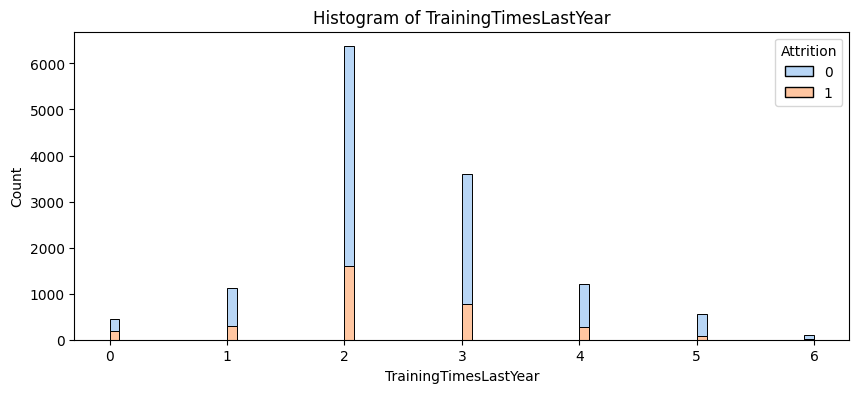

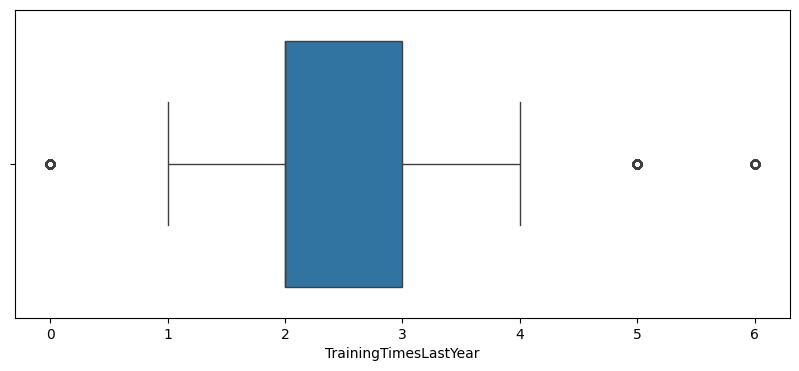

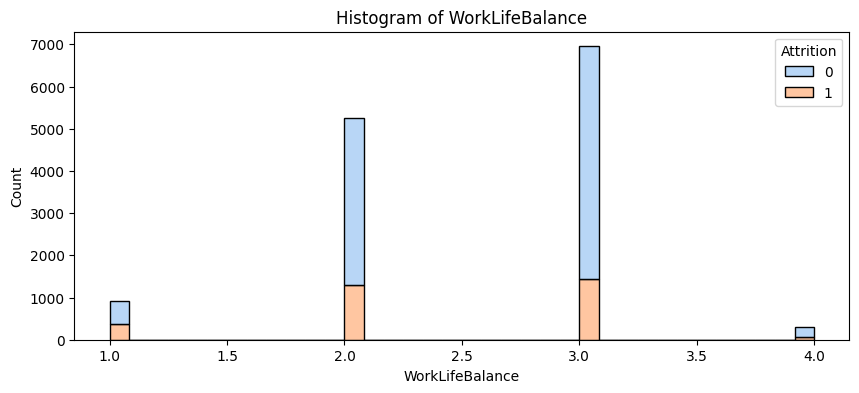

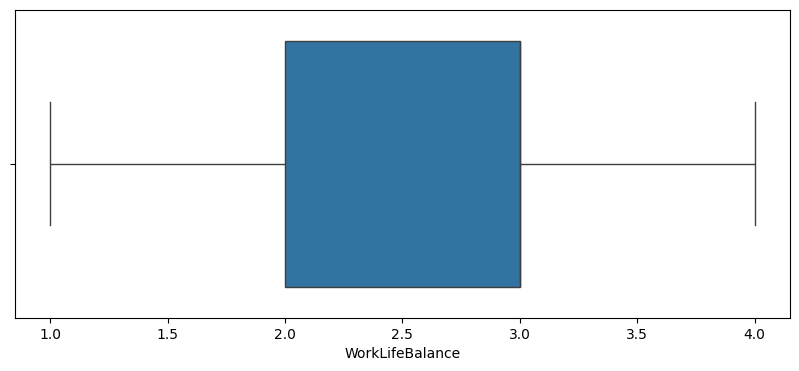

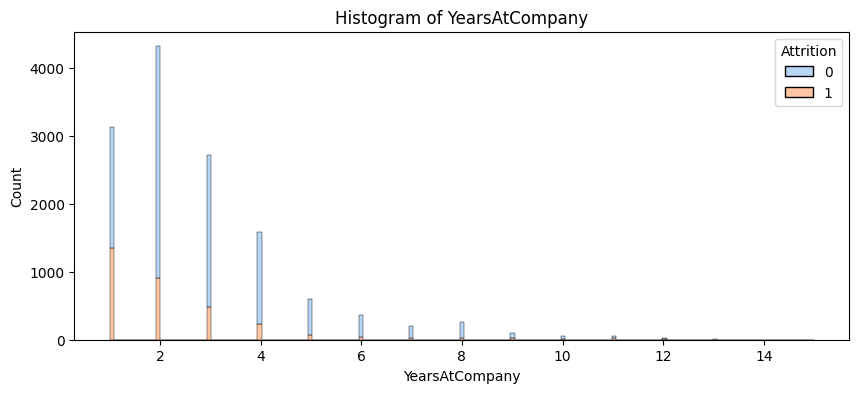

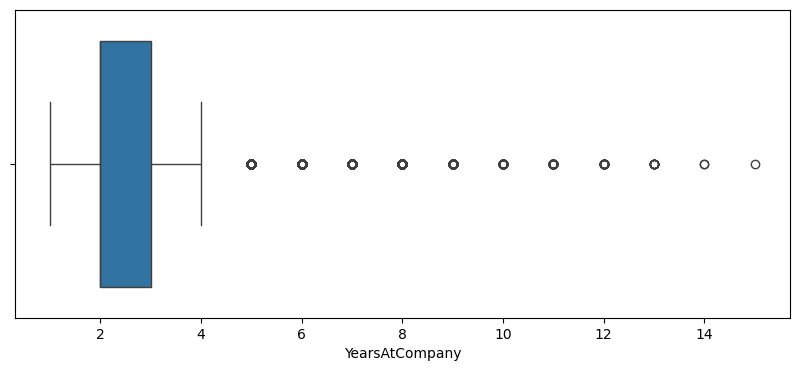

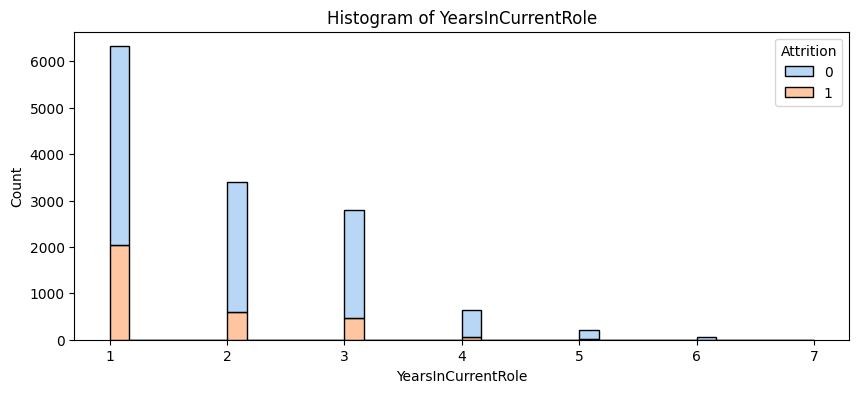

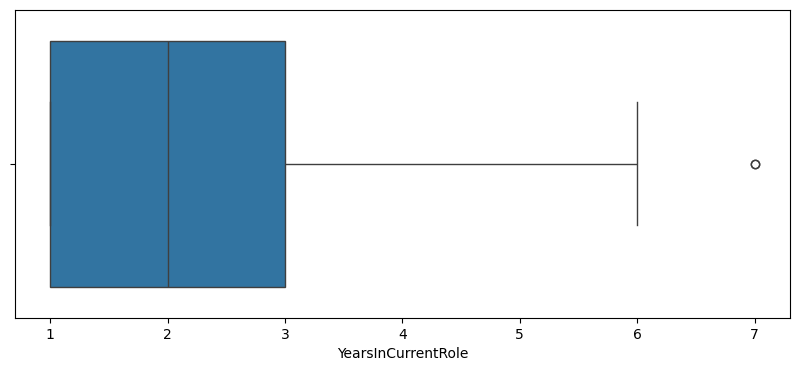

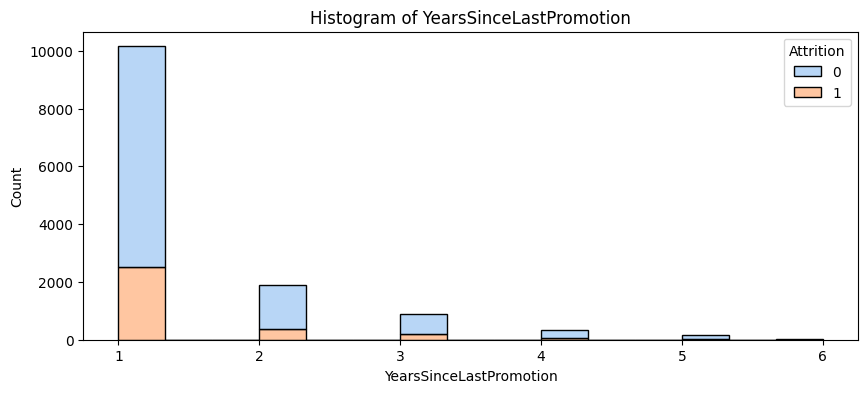

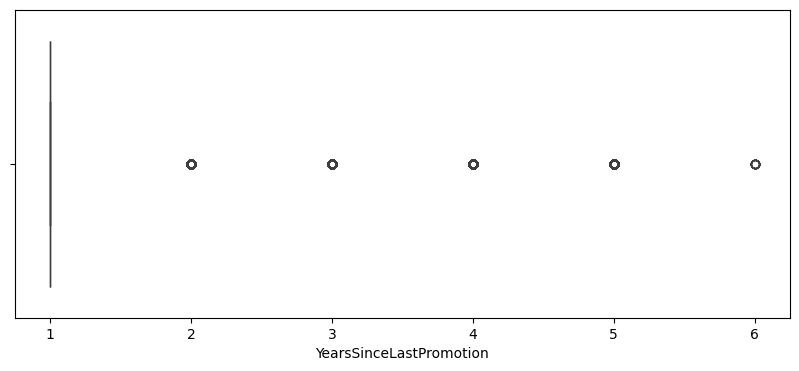

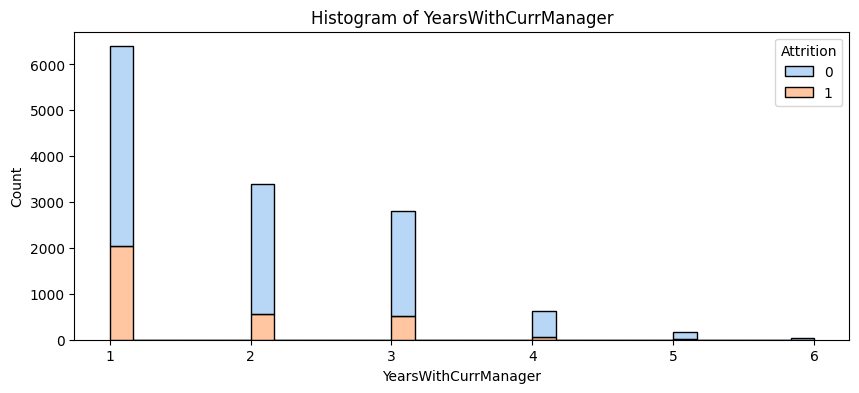

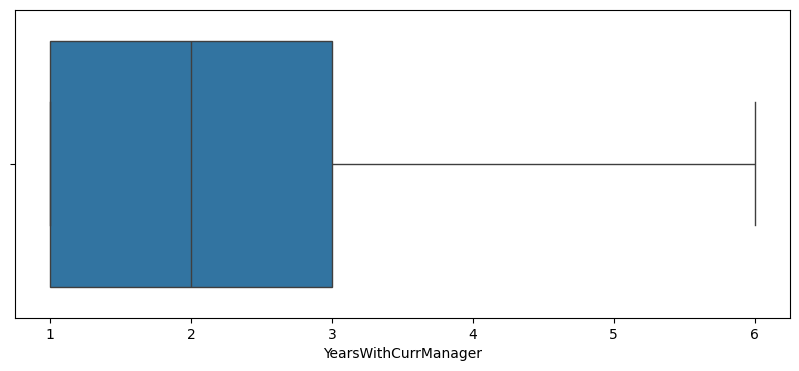

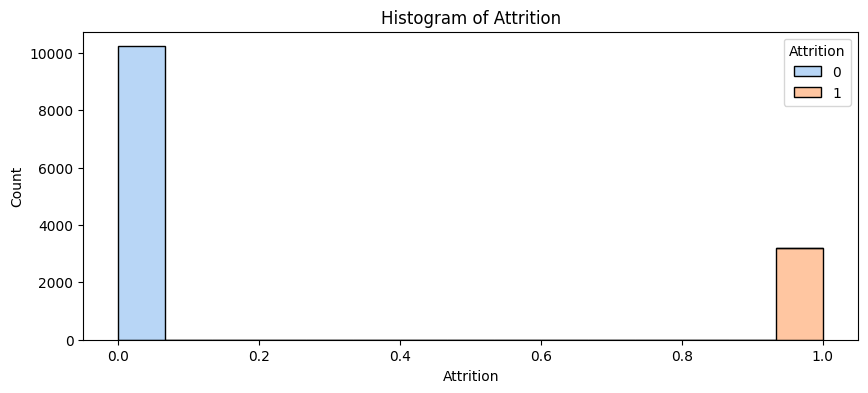

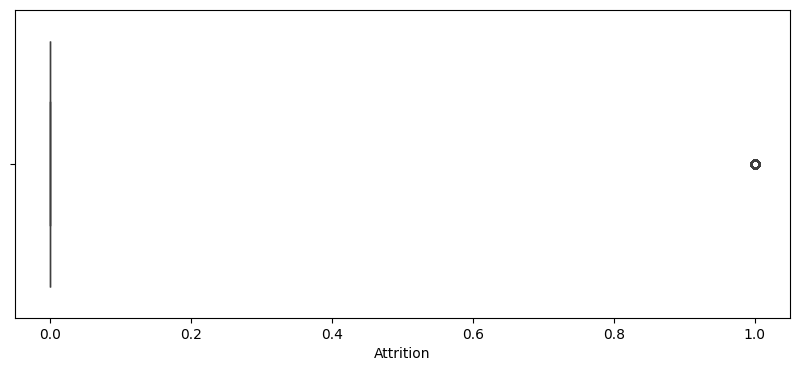

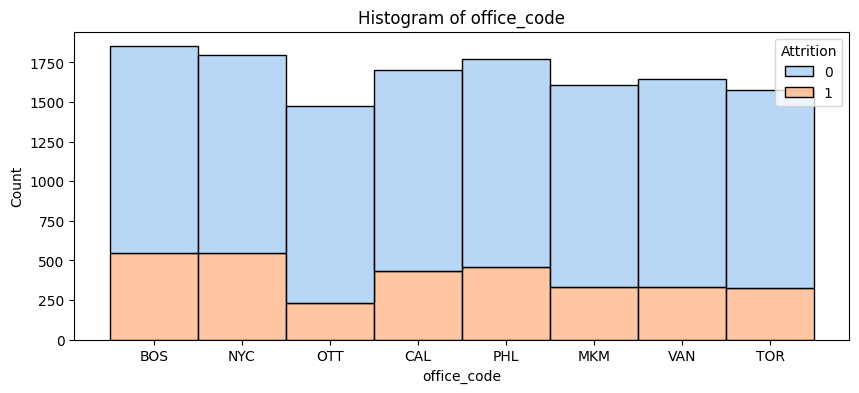

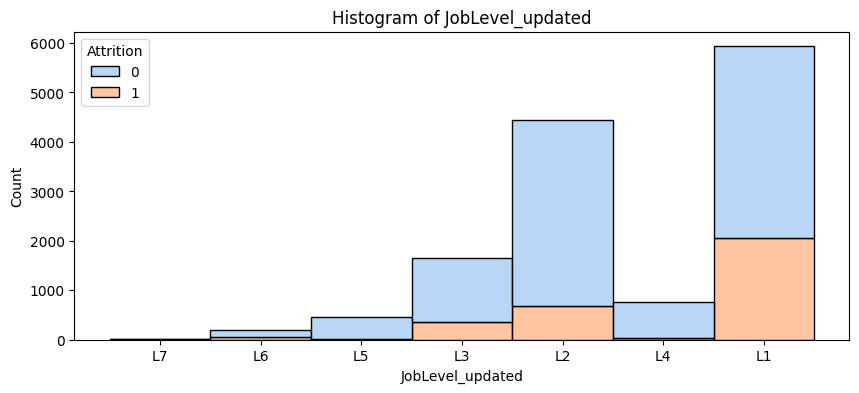

In [31]:
for col in df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=df[col], hue='Attrition', palette='pastel', multiple='stack')
    plt.title(f"Histogram of {col}")
    plt.show()

    if (df[col].dtypes != object):
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[col])
        plt.show()

# Mututal information

Here we use mutual information to identify any associations between our variables and attrition. Our objective is to remove any independent variables.

Independent variables with a score of 0:
1. EducationField
2. Gender
3. YearsSinceLastPromotion
4. RelationshipSatisfaction

In [32]:
y = df['Attrition']

In [33]:
for colname in df.select_dtypes("object"):
  df[colname], _ = df[colname].factorize()

discrete_features = df.dtypes == int

In [34]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
  mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
  mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores

mi_scores = make_mi_scores(df, y, discrete_features)
mi_scores

Attrition                   0.549722
MonthlyRate                 0.431679
MonthlyIncome               0.293426
PerformanceRating           0.266785
OverTime                    0.112983
TotalWorkingYears           0.048381
JobLevel_updated            0.036159
JoiningYear                 0.034661
Age                         0.032478
MaritalStatus               0.027047
YearsAtCompany              0.026979
YearsInCurrentRole          0.024448
YearsWithCurrManager        0.021222
BusinessTravel              0.019847
DailyRate                   0.017906
StockOptionLevel            0.017501
JobSatisfaction             0.015118
HourlyRate                  0.014094
JobInvolvement              0.013954
EnvironmentSatisfaction     0.010816
Department                  0.009962
TrainingTimesLastYear       0.009797
DistanceFromHome            0.006346
PercentSalaryHike           0.006213
WorkLifeBalance             0.004620
office_code                 0.004105
NumCompaniesWorked          0.003972
G

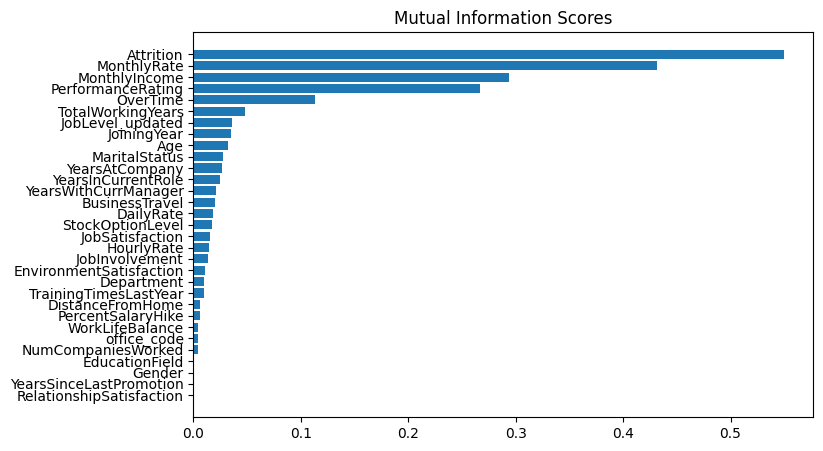

In [35]:
def plot_mi_scores(scores):
    scores = scores.sort_values()
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(figsize=(8, 5))
plot_mi_scores(mi_scores)